In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [8]:
#filename reading
#filename = 'numbers_for_checking.txt'
##filename with own mw23 clustering
filename ='numbers_with_own_clusteringmw23.txt'
df = pd.read_csv(filename,sep='\t',header=None)
df.columns = ["datatype","targettype","RunID","energy","incoming ions","delta Z","iso_corr","geo_corr"]

file_diagonal_integral_charge = "combinded_values_for_diagonal_integral.txt"
file_charge_check = "combined_charge_check_file_no_time_cut.txt"
df_charge_check = pd.read_csv(file_charge_check,sep='\t',header=None)
df_charge_check.columns = ["datatype","targettype","RunID","energy","incoming ions","survived_ions","charge_carbon_x_zero","charge_carbon_y_zero","charge_x_or_y_zero"]

df_diagonal_integral = pd.read_csv(file_diagonal_integral_charge,sep='\t',header=None)
df_diagonal_integral.columns = ["datatype","targettype","RunID","energy","integral_charge","chi2/ndf"]
print("this is df_diagonal_integral")
print(df_diagonal_integral)
print("this is df")
print(df)
print("this is result")
temp_result = df.merge(df_diagonal_integral,on=["RunID","datatype","targettype","energy"],how="inner")
result = temp_result.merge(df_charge_check,on=["RunID","datatype","targettype","energy","incoming ions"],how="inner")

result["delta Z integral"] = 1- (result["integral_charge"]/result["incoming ions"])
result["charge_carbon_x_zero"] = result["charge_carbon_x_zero"]/result["incoming ions"]
result["charge_carbon_y_zero"] = result["charge_carbon_y_zero"]/result["incoming ions"]
result["charge_x_or_y_zero"] = result["charge_x_or_y_zero"]/result["incoming ions"]
print(result)
print(result["delta Z integral"])

this is df_diagonal_integral
  datatype targettype      RunID  energy  integral_charge  chi2/ndf
0      exp     c_2198  0183_0001     400           554930  2.876040
1      exp     c_2198  0103_0001     550           368955  1.594820
2      exp     c_2198  0130_0001     650           447355  1.993160
3      exp     c_2198  0170_0001     800           404315  0.951971
4      exp      empty  0187_0001     400           564663  2.112710
5      exp      empty  0096_0001     550           445678  1.153810
6      exp      empty  0124_0001     650           513117  2.203520
7      exp      empty  0173_0001     800           388433  1.599660
this is df
  datatype targettype      RunID  energy  incoming ions   delta Z  iso_corr  \
0      exp     c_2198  0183_0001     400         657424  0.155960  0.987649   
1      exp     c_2198  0103_0001     550         437311  0.156934  0.984340   
2      exp     c_2198  0130_0001     650         531690  0.159631  0.984813   
3      exp     c_2198  0170_0001

In [3]:
target_deltaZ = df.loc[df["targettype"] == 'c_2198']

In [4]:
empty_deltaZ = df.loc[df["targettype"] == 'empty']

energy_vals = ["400","550","650","800"]
rel_iso_corr_vals = []
for ene in energy_vals:
    iso_corr_target = df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]["iso_corr"]
    print(iso_corr_target)
    iso_corr_empty = df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]["iso_corr"]
    print(iso_corr_empty)
    rel_iso_corr = float(iso_corr_target)/float(iso_corr_empty)
    print("this is rel iso corr:\t",rel_iso_corr)
    rel_iso_corr_vals.append(rel_iso_corr)
#print(energy_vals)
print(rel_iso_corr_vals)
    
    

0    0.987649
Name: iso_corr, dtype: float64
4    0.997632
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9899933041442135
1    0.98434
Name: iso_corr, dtype: float64
5    0.997752
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9865577818936969
2    0.984813
Name: iso_corr, dtype: float64
6    0.997709
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9870743874215827
3    0.987349
Name: iso_corr, dtype: float64
7    0.998275
Name: iso_corr, dtype: float64
this is rel iso corr:	 0.9890551200821417
[0.9899933041442135, 0.9865577818936969, 0.9870743874215827, 0.9890551200821417]


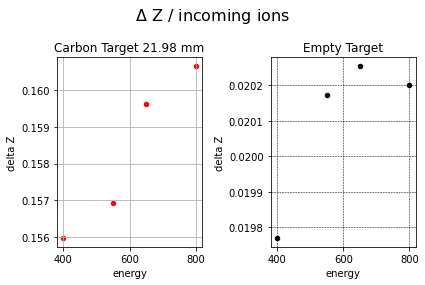

In [5]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
target_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'delta Z', color='red',marker= "o",alpha = 1,title="Carbon Target 21.98 mm")
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
empty_deltaZ.plot(kind='scatter',ax=ax[1],x='energy',y = 'delta Z', color='black',marker= "o",alpha = 1,title="Empty Target")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
ax[0].grid()
ax[1].grid()
fig.suptitle(r'$\Delta$ Z / incoming ions',fontsize=16)
plt.tight_layout()
#plt.show()
plt.savefig("delta_z.png",dpi=300)

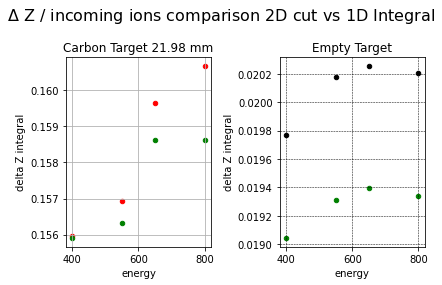

In [6]:
target_deltaZ_integral = result.loc[result["targettype"] == 'c_2198']
empty_deltaZ_integral = result.loc[result["targettype"] == 'empty']
fig, ax = plt.subplots(1, 2)
fig.tight_layout()
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
target_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'delta Z', color='red',marker= "o",alpha = 1,title="Carbon Target 21.98 mm")
target_deltaZ_integral.plot(kind='scatter',ax=ax[0],x='energy',y = 'delta Z integral', color='green',marker= "o",alpha = 1,title="Carbon Target 21.98 mm")

plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
empty_deltaZ.plot(kind='scatter',ax=ax[1],x='energy',y = 'delta Z', color='black',marker= "o",alpha = 1,title="Empty Target")
empty_deltaZ_integral.plot(kind='scatter',ax=ax[1],x='energy',y = 'delta Z integral', color='green',marker= "o",alpha = 1,title="Empty Target")

#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
ax[0].grid()
ax[1].grid()
fig.suptitle(r'$\Delta$ Z / incoming ions comparison 2D cut vs 1D Integral',fontsize=16)
plt.tight_layout()
#plt.show()
plt.savefig("delta_z.png",dpi=300)

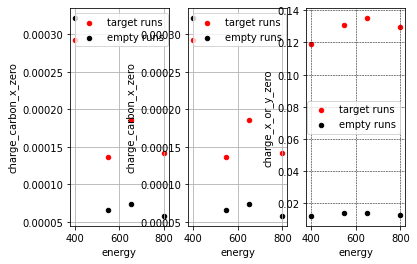

In [17]:
#plot how often you have zero charge on the first 8 anodes, last 8 anodes or both of them
fig, ax = plt.subplots(1, 3)
#fig.tight_layout()
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
target_deltaZ_integral.plot(kind='scatter',ax=ax[0],x='energy',y = "charge_carbon_x_zero", color='red',marker= "o",alpha = 1,label="target runs")
empty_deltaZ_integral.plot(kind='scatter',ax=ax[0],x='energy',y = "charge_carbon_x_zero", color='black',marker= "o",alpha = 1,label="empty runs")
target_deltaZ_integral.plot(kind='scatter',ax=ax[1],x='energy',y = "charge_carbon_x_zero", color='red',marker= "o",alpha = 1,label="target runs")
empty_deltaZ_integral.plot(kind='scatter',ax=ax[1],x='energy',y = "charge_carbon_x_zero", color='black',marker= "o",alpha = 1,label="empty runs")
target_deltaZ_integral.plot(kind='scatter',ax=ax[2],x='energy',y = "charge_x_or_y_zero", color='red',marker= "o",alpha = 1,label="target runs")
empty_deltaZ_integral.plot(kind='scatter',ax=ax[2],x='energy',y = "charge_x_or_y_zero", color='black',marker= "o",alpha = 1,label="empty runs")
ax[0].grid()
ax[1].grid()
ax[2].grid()
#plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(1, 3)
fig.tight_layout()
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
target_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'iso_corr', color='red',marker= "o",alpha = 1,title="Carbon Target 21.98 mm")
plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
empty_deltaZ.plot(kind='scatter',ax=ax[1],x='energy',y = 'iso_corr', color='black',marker= "o",alpha = 1,title="Empty Target")
#ax[2].plot(kind='scatter',x=energy_vals,y=rel_iso_corr_vals)
ax[2].scatter(energy_vals,rel_iso_corr_vals,label="target/empty")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
ax[0].grid()
ax[1].grid()
ax[2].set_title("Target/Empty")
ax[2].set_xlabel("energy")
fig.suptitle("Isotopic Correction 12C/11C/10C",fontsize=16)
plt.tight_layout()
#plt.show()
plt.savefig("iso_corr.png",dpi=300)

In [ ]:
fig, ax = plt.subplots(1,2)
fig.tight_layout()
rel_geo_corr = []
for ene in energy_vals:
    geo_corr_target = df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]["geo_corr"]
    geo_corr_empty = df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]["geo_corr"]
    rel_geo_corr_tmp = float(geo_corr_target)/float(geo_corr_empty)
    rel_geo_corr.append(rel_geo_corr_tmp)
target_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'geo_corr', color='red',marker= "o",alpha = 1,label="thick target (21mm)")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
empty_deltaZ.plot(kind='scatter',ax=ax[0],x='energy',y = 'geo_corr', color='black',marker= "o",alpha = 1,label="empty target")
#plt.grid(True,color = 'black', linestyle = '--', linewidth = 0.5,which="both")
ax[1].scatter(energy_vals,rel_geo_corr,label="hello")
ax[0].grid()
ax[1].grid()
ax[1].set_title("Target/Empty")
ax[1].set_xlabel("energy")
fig.suptitle("Geometric Correction",fontsize=16)
plt.tight_layout()
#plt.show()
plt.savefig("geo_corr.png",dpi=300)

In [ ]:
#df_div = float(target_deltaZ["geo_corr"])/float(empty_deltaZ["geo_corr"])
#df_div = target_deltaZ["geo_corr"].div((empty_deltaZ["geo_corr"]))
#print(target_deltaZ)
df_target = df.loc[(df["targettype"] == "c_2198")]["geo_corr"]
df_empty = df.loc[(df["targettype"] == "empty")]["geo_corr"]
for ene in energy_vals:
    geo_corr_target = df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]["geo_corr"]
    geo_corr_empty = df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]["geo_corr"]
    print("this is geo_corr target:\t",geo_corr_target)
    print("this is geo_corr_empty:\t",geo_corr_empty)
    rel_geo_corr = float(geo_corr_target)/float(geo_corr_empty)
    print("rel_geo_corr:\t",rel_geo_corr)


In [ ]:
new_density = 1.851
T_2198 = (new_density)*(2.1928)*(6.02214076)*(pow(10,23))/(12.011);
factor = (1./T_2198)*(pow(10,27))
df['delta Z'] = df['delta Z'].astype(float)
df['geo_corr'] = df['geo_corr'].astype(float)
df['iso_corr'] = df['iso_corr'].astype(float)
charge_changing_vals = []
fake_charge_changing = []
charge_changing_no_geo = []
for ene in energy_vals:
    #print ("hello",(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['delta Z'])/(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['delta Z']))
    dz = (1-float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['delta Z']))/(1-float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['delta Z']))
    d_iso = float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['iso_corr'])/float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['iso_corr'])
    d_geo =  float(df.loc[(df["targettype"] == "c_2198") & (df["energy"] == float(ene))]['geo_corr'])/float(df.loc[(df["targettype"] == "empty") & (df["energy"] == float(ene))]['geo_corr'])
    print (d_iso)
    cs = factor*(-math.log(dz)-math.log(d_iso)-math.log(d_geo))
    cc = factor*(-math.log(dz)-math.log(d_geo))
    fake_cs = factor*(-math.log(dz))
    print("reaction cross section:\t",cs)
    #print("charge changing cross section:\t",cc)
    #print("fake cross section:\t",fake_cs)
    charge_changing_vals.append(cc)
    charge_changing_no_geo.append(fake_cs)

fig, ax = plt.subplots()
ax.scatter(energy_vals,charge_changing_vals,label="with geo. corr",color='red')
ax.scatter(energy_vals,charge_changing_no_geo,label="no geo. corr",color ='orange')
ax.grid()
ax.set_title("Charge Changing Cross Section with geo. corr. ")
ax.set_xlabel("energy")
ax.set_ylabel("charge changing cross sec [mbarn]")
plt.legend()
#plt.show()
plt.savefig("geo_charge_changing_cross_section.png",dpi=300)

fig, ax = plt.subplots()
ax.scatter(energy_vals,charge_changing_no_geo,label="hello")
ax.grid()
ax.set_title("Charge Changing Cross Section no geo. corr. ")
ax.set_xlabel("energy")
ax.set_ylabel("charge changing cross sec [mbarn]")
#plt.show()
plt.savefig("no_geo_charge_changing_cross_section.png",dpi=300)
    
    